In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#I used Chat GPT in order to guide me through using sklearn 

In [3]:
##Imported Red Wine Quality Data##
wine = pd.read_csv("wine quality/winequality-red.csv", sep=";")

wine["quality"] = (wine["quality"] >= 7).astype(int)

X_wine = wine.drop("quality", axis=1)
y_wine = wine["quality"]

print(len(y_wine))

1599


In [6]:
##Imported Heart Disease Data##
col_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heart = pd.read_csv("heart disease/processed.cleveland.data", header=None, names=col_names)

heart = heart.replace("?", np.nan)
heart = heart.dropna()
heart = heart.astype(float)

heart['target'] = (heart['target'] > 0).astype(int)

X_heart = heart.drop("target", axis=1)
y_heart = heart["target"]

print(len(y_heart))

297


In [7]:
##Imported Breast Cancer Data##
col_names = [
    "id","diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean",
    "fractal_dimension_mean",

    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se",
    "fractal_dimension_se",

    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst",
    "fractal_dimension_worst"
]

cancer = pd.read_csv("breast cancer/wdbc.data", header=None, names=col_names)
#cancer.columns = col_names

cancer = cancer.drop("id", axis=1)
cancer["diagnosis"] = cancer["diagnosis"].map({"M": 1, "B": 0})
X_cancer = cancer.drop("diagnosis", axis=1)
y_cancer = cancer["diagnosis"]

print(len(y_cancer))

569


## Tests ##

In [32]:
results = []

datasets = {
    "Wine": (X_wine, y_wine),
    "Breast Cancer": (X_cancer, y_cancer),
    "Heart Disease": (X_heart, y_heart)
}

splits = [(0.2, 0.8), (0.5, 0.5), (0.8, 0.2)]
trials = [1, 2, 3]

for dataset_name, (X, y) in datasets.items():

    print("\n#########################################################")
    print(f"                    DATASET: {dataset_name}")
    print("#########################################################\n")

    for train_size, test_size in splits:
        print("\n---------------------------------------------------------")
        print(f"Running train/test split: {train_size} train, {test_size} test")
        print("---------------------------------------------------------\n")

        for trial in trials:
            print(f"\n********************* TRIAL {trial} *********************\n")

            # Create split
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                train_size=train_size,
                test_size=test_size,
                stratify=y,
                random_state=trial
            )

            # =================================================
            # 1. Logistic Regression
            # =================================================
            print("====== Logistic Regression ======")

            lr_grid = GridSearchCV(lr_pipe, lr_params, cv=5, scoring="accuracy")
            lr_grid.fit(X_train, y_train)

            lr_train_acc = accuracy_score(y_train, lr_grid.predict(X_train))
            lr_val_acc = lr_grid.best_score_
            lr_test_acc = accuracy_score(y_test, lr_grid.predict(X_test))

            print(" Best Params:", lr_grid.best_params_)
            print(" Train Accuracy:", lr_train_acc)
            print(" Validation Accuracy (CV):", lr_val_acc)
            print(" Test Accuracy:", lr_test_acc, "\n")

            results.append({
                "Dataset": dataset_name,
                "Classifier": "Logistic Regression",
                "Train Size": train_size,
                "Trial": trial,
                "Train Accuracy": lr_train_acc,
                "Validation Accuracy": lr_val_acc,
                "Test Accuracy": lr_test_acc,
                "Best Params": lr_grid.best_params_
            })


            # =================================================
            # 2. SVM (RBF)
            # =================================================
            print("====== SVM (RBF) ======")

            svm_grid = GridSearchCV(svm_pipe, svm_params, cv=5, scoring="accuracy")
            svm_grid.fit(X_train, y_train)

            svm_train_acc = accuracy_score(y_train, svm_grid.predict(X_train))
            svm_val_acc = svm_grid.best_score_
            svm_test_acc = accuracy_score(y_test, svm_grid.predict(X_test))

            print(" Best Params:", svm_grid.best_params_)
            print(" Train Accuracy:", svm_train_acc)
            print(" Validation Accuracy (CV):", svm_val_acc)
            print(" Test Accuracy:", svm_test_acc, "\n")

            results.append({
                "Dataset": dataset_name,
                "Classifier": "SVM (RBF)",
                "Train Size": train_size,
                "Trial": trial,
                "Train Accuracy": svm_train_acc,
                "Validation Accuracy": svm_val_acc,
                "Test Accuracy": svm_test_acc,
                "Best Params": svm_grid.best_params_
            })


            # =================================================
            # 3. RANDOM FOREST
            # =================================================
            print("====== Random Forest ======")

            rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5, scoring="accuracy")
            rf_grid.fit(X_train, y_train)

            rf_train_acc = accuracy_score(y_train, rf_grid.predict(X_train))
            rf_val_acc = rf_grid.best_score_
            rf_test_acc = accuracy_score(y_test, rf_grid.predict(X_test))

            print(" Best Params:", rf_grid.best_params_)
            print(" Train Accuracy:", rf_train_acc)
            print(" Validation Accuracy (CV):", rf_val_acc)
            print(" Test Accuracy:", rf_test_acc)
            print("=========================================================\n")

            results.append({
                "Dataset": dataset_name,
                "Classifier": "Random Forest",
                "Train Size": train_size,
                "Trial": trial,
                "Train Accuracy": rf_train_acc,
                "Validation Accuracy": rf_val_acc,
                "Test Accuracy": rf_test_acc,
                "Best Params": rf_grid.best_params_
            })

df_results = pd.DataFrame(results)
df_results.to_csv("all_classifier_results.csv", index=False)
df_results



#########################################################
                    DATASET: Wine
#########################################################


---------------------------------------------------------
Running train/test split: 0.2 train, 0.8 test
---------------------------------------------------------


********************* TRIAL 1 *********************

====== Logistic Regression ======
 Best Params: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
 Train Accuracy: 0.8840125391849529
 Validation Accuracy (CV): 0.8715277777777779
 Test Accuracy: 0.86484375 

====== SVM (RBF) ======
 Best Params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'rbf'}
 Train Accuracy: 0.9905956112852664
 Validation Accuracy (CV): 0.8777777777777779
 Test Accuracy: 0.8734375 

====== Random Forest ======
 Best Params: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
 Train Accuracy: 0.9529780564263323
 Validation Accuracy 

,Dataset,Classifier,Train Size,Trial,Train Accuracy,Validation Accuracy,Test Accuracy,Best Params
0,Wine,Logistic Regression,0.2,1,0.884013,0.871528,0.864844,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol..."
1,Wine,SVM (RBF),0.2,1,0.990596,0.877778,0.873437,"{'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': ..."
2,Wine,Random Forest,0.2,1,0.952978,0.902827,0.856250,"{'clf__max_depth': 5, 'clf__max_features': 'sq..."
3,Wine,Logistic Regression,0.2,2,0.884013,0.871379,0.874219,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol..."
4,Wine,SVM (RBF),0.2,2,0.924765,0.874554,0.862500,"{'clf__C': 100, 'clf__gamma': 0.01, 'clf__kern..."
...,...,...,...,...,...,...,...,...
76,Heart Disease,SVM (RBF),0.8,2,0.848101,0.843617,0.850000,"{'clf__C': 1, 'clf__gamma': 0.01, 'clf__kernel..."
77,Heart Disease,Random Forest,0.8,2,0.949367,0.843706,0.816667,"{'clf__max_depth': 5, 'clf__max_features': 'lo..."
78,Heart Disease,Logistic Regression,0.8,3,0.860759,0.852660,0.783333,"{'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol..."
79,Heart Disease,SVM (RBF),0.8,3,0.860759,0.848404,0.800000,"{'clf__C': 1, 'clf__gamma': 0.01, 'clf__kernel..."


In [33]:
df_avg = df_results.groupby(
    ["Dataset", "Classifier", "Train Size"]
).mean(numeric_only=True).reset_index()

df_avg

,Dataset,Classifier,Train Size,Trial,Train Accuracy,Validation Accuracy,Test Accuracy
0,Breast Cancer,Logistic Regression,0.2,2.0,0.985251,0.962187,0.967105
1,Breast Cancer,Logistic Regression,0.5,2.0,0.989437,0.983521,0.973099
2,Breast Cancer,Logistic Regression,0.8,2.0,0.986813,0.978755,0.982456
3,Breast Cancer,Random Forest,0.2,2.0,1.000000,0.944137,0.941520
4,Breast Cancer,Random Forest,0.5,2.0,0.998826,0.962490,0.952047
5,Breast Cancer,Random Forest,0.8,2.0,0.997070,0.962637,0.956140
6,Breast Cancer,SVM (RBF),0.2,2.0,0.982301,0.964954,0.970760
7,Breast Cancer,SVM (RBF),0.5,2.0,0.992958,0.974185,0.973099
8,Breast Cancer,SVM (RBF),0.8,2.0,0.989744,0.977289,0.979532
9,Heart Disease,Logistic Regression,0.2,2.0,0.881356,0.865152,0.822129


## Visualization ##

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.1)


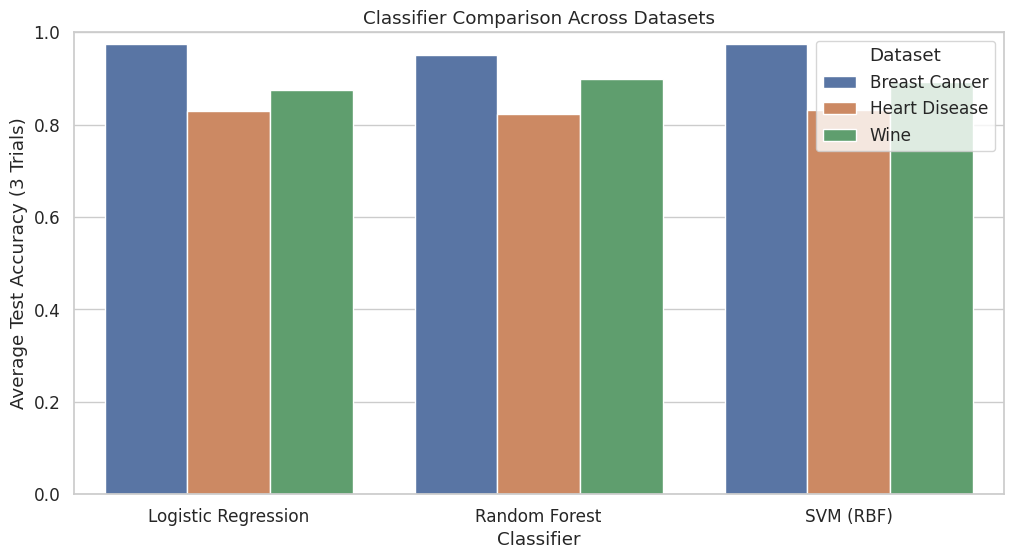

In [36]:
## Barplot ##

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_avg,
    x="Classifier",
    y="Test Accuracy",
    hue="Dataset",
    ci=None
)
plt.title("Classifier Comparison Across Datasets")
plt.ylabel("Average Test Accuracy (3 Trials)")
plt.legend(title="Dataset")
plt.ylim(0,1)
plt.show()


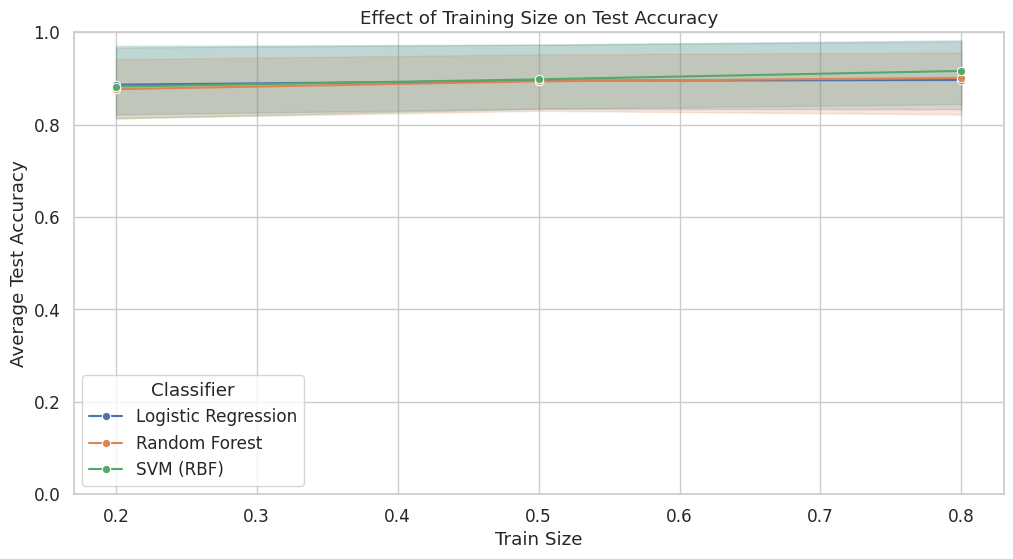

In [37]:
## Line Plot ##
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_avg,
    x="Train Size",
    y="Test Accuracy",
    hue="Classifier",
    marker="o"
)
plt.title("Effect of Training Size on Test Accuracy")
plt.ylabel("Average Test Accuracy")
plt.ylim(0,1)
plt.show()


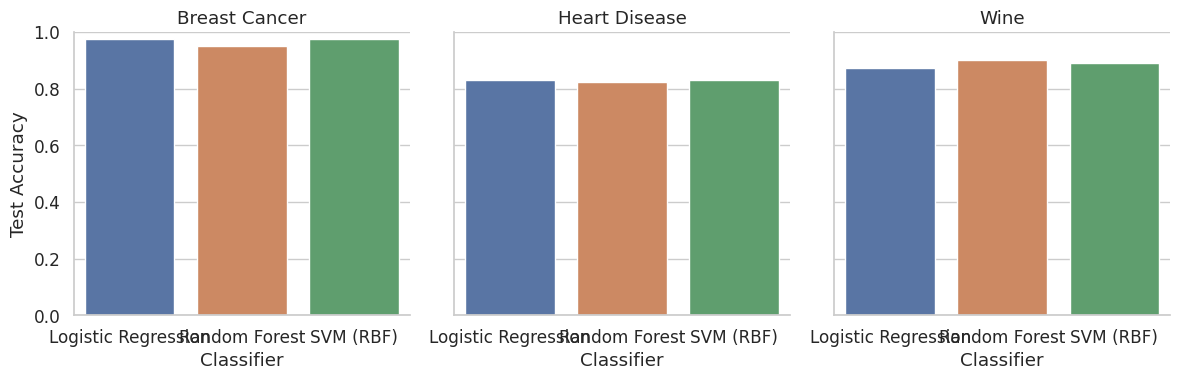

In [38]:
g = sns.FacetGrid(df_avg, col="Dataset", height=4, aspect=1)
g.map_dataframe(
    sns.barplot,
    x="Classifier",
    y="Test Accuracy",
    palette="deep",
    ci=None
)
g.set_titles("{col_name}")
g.set_axis_labels("Classifier", "Test Accuracy")
plt.ylim(0,1)
plt.show()
